### Model Training

ANN & CNN MODEL

###### V1: 5 EPOCHS
###### V2: 20 EPOCHS
###### V3: MODEL FINE TUNING

#### Imports

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Embedding, GlobalMaxPooling1D
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report

#### Train ANN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8220 - loss: 0.3102 - val_accuracy: 0.9788 - val_loss: 0.0624
Epoch 2/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9861 - loss: 0.0480 - val_accuracy: 0.9744 - val_loss: 0.0829
Epoch 3/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9823 - val_loss: 0.0673
Epoch 4/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9986 - loss: 0.0065 - val_accuracy: 0.9805 - val_loss: 0.0898
Epoch 5/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9812 - val_loss: 0.1326
Epoch 6/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9741 - val_loss: 0.2047
Epoch 7/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9831 - val_loss: 0.1319
Epoch 8/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9997 - loss: 0.0019 - 

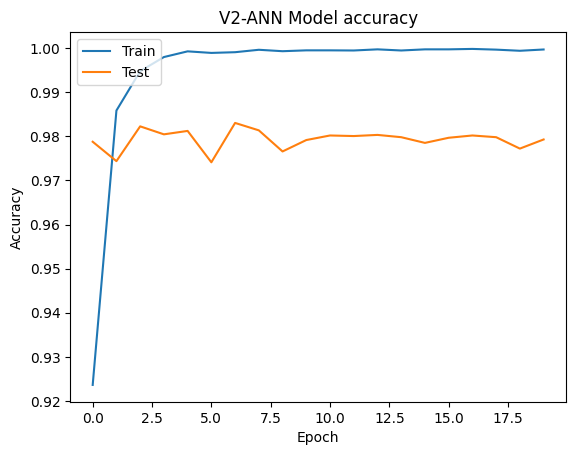

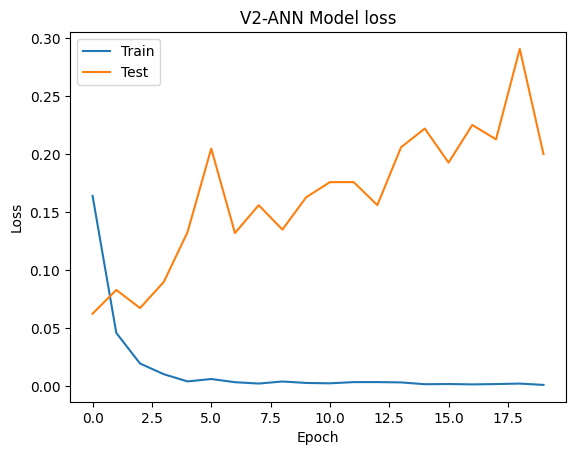

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9790 - loss: 0.2020
Test Loss: 0.1999446451663971
Test Accuracy: 0.9793014526367188
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


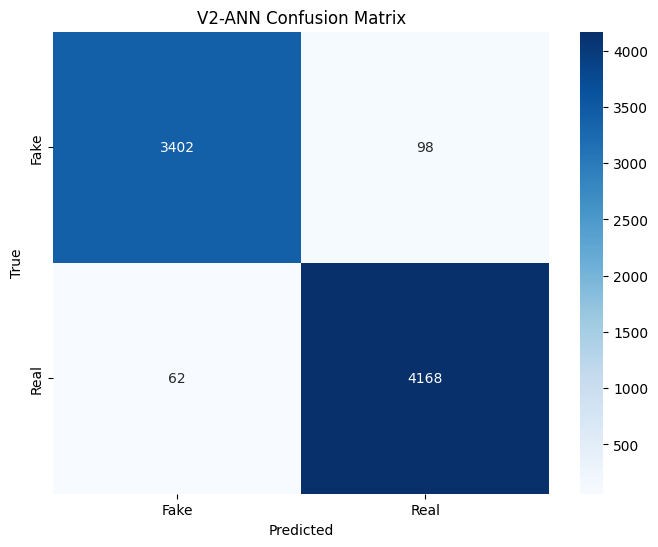

              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98      3500
        Real       0.98      0.99      0.98      4230

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



In [6]:
# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

# Save the tokenizer
with open('./models/ann-tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the ANN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), batch_size=32)

# Save the trained model
model.save('./models/ann-model-v2.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('V2-ANN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('V2-ANN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-ANN Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Train CNN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8144 - loss: 0.3186 - val_accuracy: 0.9741 - val_loss: 0.0626
Epoch 2/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9766 - val_loss: 0.0704
Epoch 3/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9657 - val_loss: 0.1713
Epoch 4/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9779 - val_loss: 0.0967
Epoch 5/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9750 - val_loss: 0.1245
Epoch 6/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9763 - val_loss: 0.2600
Epoch 7/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 0.9750 - val_loss: 0.1950
Epoch 8/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9992 - loss: 0.0022 - 

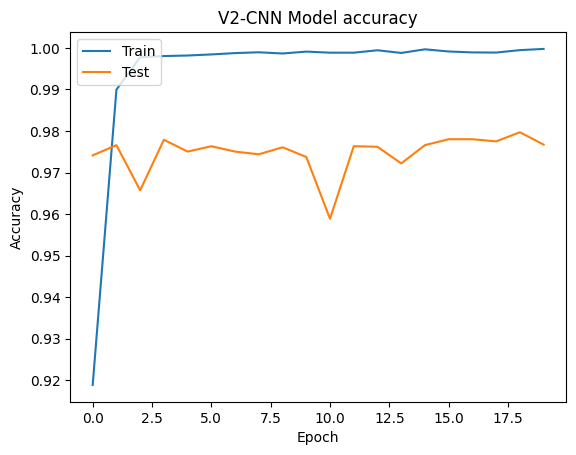

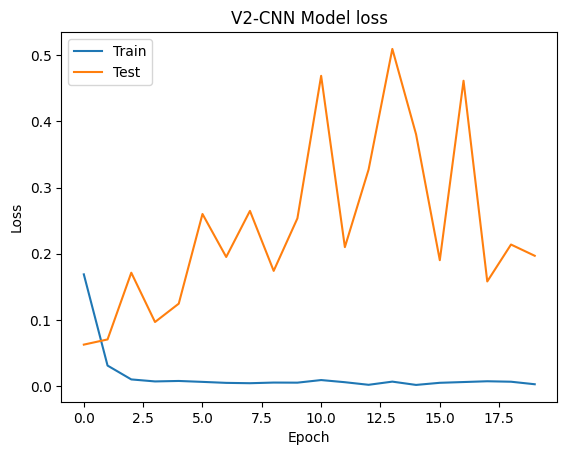

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9767 - loss: 0.1802
Test Loss: 0.19682355225086212
Test Accuracy: 0.9767140746116638
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


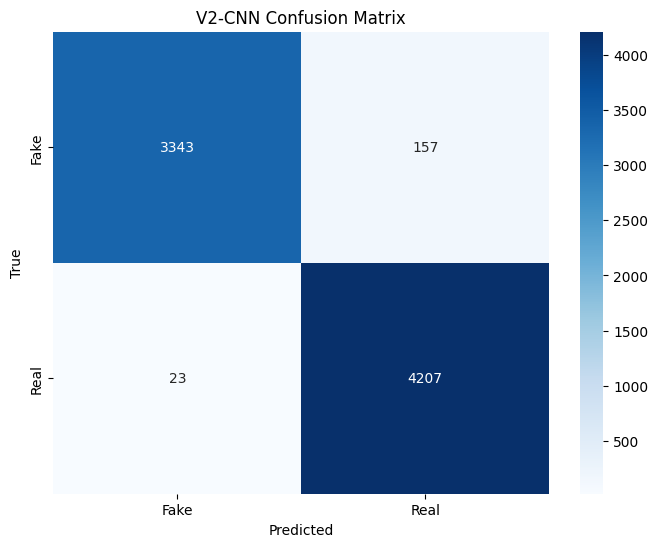

              precision    recall  f1-score   support

        Fake       0.99      0.96      0.97      3500
        Real       0.96      0.99      0.98      4230

    accuracy                           0.98      7730
   macro avg       0.98      0.97      0.98      7730
weighted avg       0.98      0.98      0.98      7730



In [5]:
# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

# Save the tokenizer
with open('./models/cnn-tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the CNN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), batch_size=32)

# Save the trained model
model.save('./models/cnn-model-v2.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('V2-CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('V2-CNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-CNN Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Adjusted ANN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8095 - loss: 0.8236 - val_accuracy: 0.9631 - val_loss: 0.3258 - learning_rate: 0.0010
Epoch 2/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9549 - loss: 0.3351 - val_accuracy: 0.9674 - val_loss: 0.2493 - learning_rate: 0.0010
Epoch 3/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9700 - loss: 0.2269 - val_accuracy: 0.9735 - val_loss: 0.1735 - learning_rate: 0.0010
Epoch 4/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9756 - loss: 0.1605 - val_accuracy: 0.9736 - val_loss: 0.1404 - learning_rate: 0.0010
Epoch 5/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9834 - loss: 0.1162 - val_accuracy: 0.9752 - val_loss: 0.1187 - learning_rate: 0.0010
Epoch 6/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9844 - loss: 0.0909 - val_accuracy: 0.9768 - val_loss: 0.1147 - learning_rate: 0.0010
Epoch 7/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9824 - l

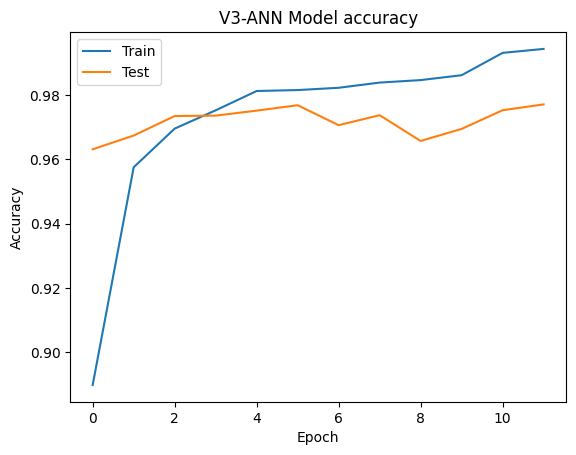

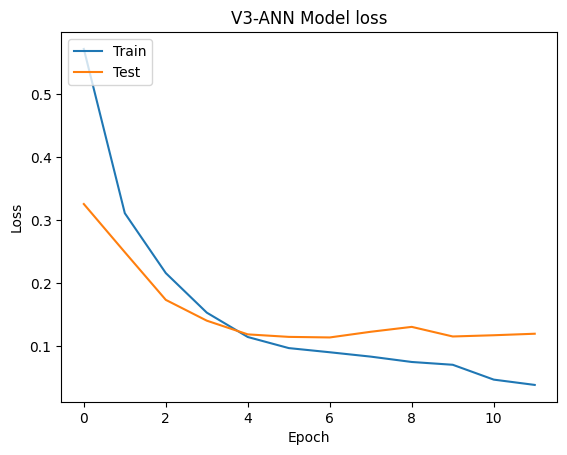

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9745 - loss: 0.1055
Test Loss: 0.1137733981013298
Test Accuracy: 0.970633864402771
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


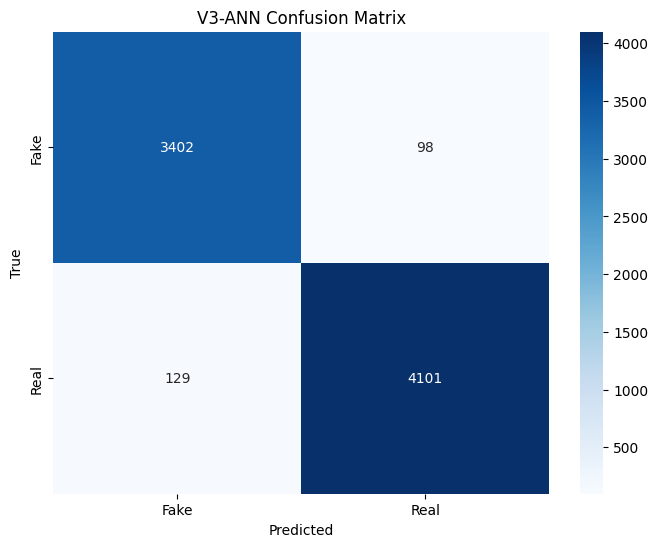

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.97      3500
        Real       0.98      0.97      0.97      4230

    accuracy                           0.97      7730
   macro avg       0.97      0.97      0.97      7730
weighted avg       0.97      0.97      0.97      7730



In [7]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Load the tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the text data
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the ANN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=50, validation_data=(X_test, y_test_one_hot), batch_size=32, callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('./models/ann-model-v3.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('V3-ANN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('V3-ANN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V3-ANN Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real'])
print(report)

In [35]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.5.0
Datetime: 2024-05-31 16:22:03
Python Version: 3.12.1
-----------------------------------
